In [1]:
import arlpy.uwapm as pm
import numpy as np

In [2]:
rx_range = np.linspace(-10000, 10000, 1081)
rx_depth = np.linspace(0, 3100,  720)

In [3]:
ssp_range = 0
ssp_depth = np.array([100, 500, 1000, 2500])
ssp       = np.array([1200,  1600, 1600, 1700])

In [4]:
bot_range     = np.array([-10000, -500, 5000, 7000, 10000])
bot_interface = np.array([2000, 1000, 3000, 2000, 1500])

In [5]:
bot_xrange      = np.array([-1000, 0, 2000])
bot_xdepth      = 0
bot_attenuation = np.array([0.01, 0.015, 0.012])
bot_ssp         = np.array([5000, 6600, 5900])
bot_density     = np.array([2.7, 2.3, 2.5])

In [6]:
env = pm.make_env2d(
            
    pad_inputData   = True, 
    name            = 'Example',
    
    # ALL: Receiver positoins
    rx_range        = rx_range,                                   # m
    rx_depth        = rx_depth,                                  # m
    
    # ALL: Sound speed profiles
    ssp_range       = ssp_range,                                  # m
    ssp_depth       = ssp_depth,                                  # m
    ssp             = ssp,                                        # m/s
    
    # ALL: Source freq and depth
    tx_freq         = 15,                                         # Hz
    tx_depth        = 500,                                        # m

    # ALL: Bottom interface
    bot_interface   = np.column_stack((bot_range,bot_interface)), # m
                                                    
    # RAM: Bottom settings   
    bot_range       = bot_xrange,
    bot_depth       = bot_xdepth,
    bot_PwaveSpeed  = bot_ssp,
    bot_density     = bot_density,
    bot_PwaveAttn   = bot_attenuation,
    )

In [7]:
RAM = pm.RAM(env)
RAM.compute_transmission_loss()

array([[2.09317505e-05, 2.15755675e-05, 2.21872509e-05, ...,
        7.32246017e-05, 6.57645782e-05, 5.53112809e-05],
       [3.49718608e-05, 3.55393835e-05, 3.62261373e-05, ...,
        1.01678575e-04, 7.05963505e-05, 3.86467428e-05],
       [6.81190052e-05, 6.92349251e-05, 7.05726023e-05, ...,
        1.95111451e-04, 1.36049086e-04, 7.56664610e-05],
       ...,
       [2.11534011e-05, 2.18306679e-05, 2.24337231e-05, ...,
        7.18613198e-05, 6.38294003e-05, 5.28531524e-05],
       [2.10452342e-05, 2.17072676e-05, 2.23155049e-05, ...,
        7.25466274e-05, 6.48027771e-05, 5.40890153e-05],
       [2.09317505e-05, 2.15755675e-05, 2.21872509e-05, ...,
        7.32246017e-05, 6.57645782e-05, 5.53112809e-05]])

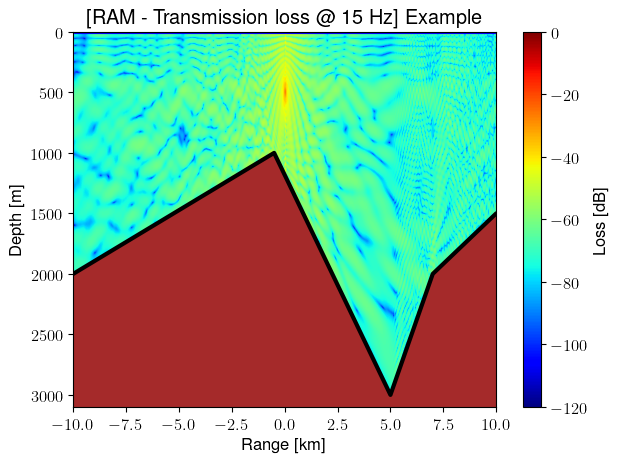

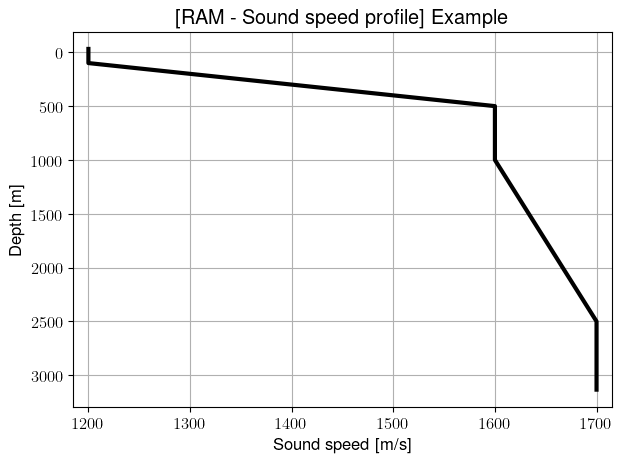

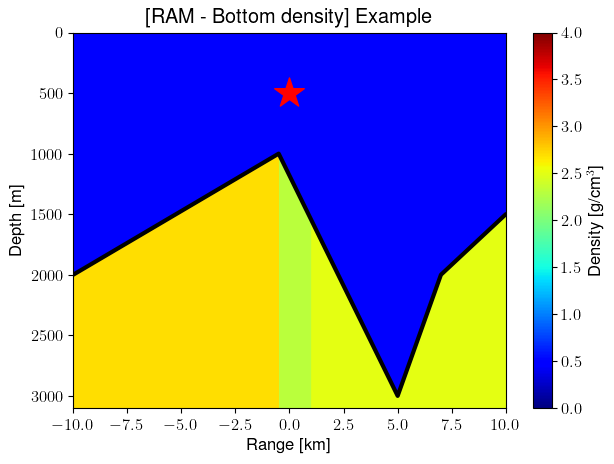

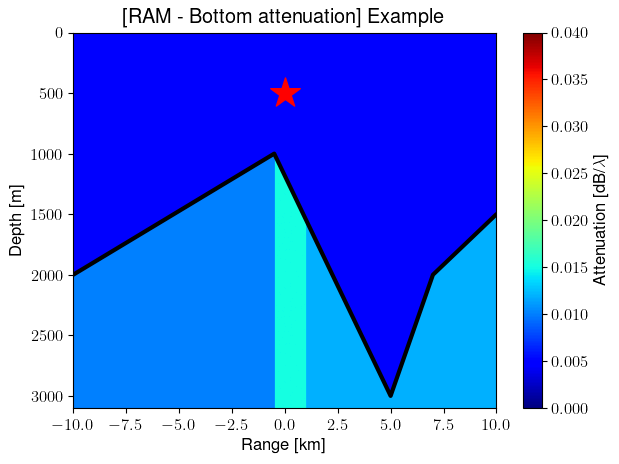

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': '[RAM - Bottom attenuation] Example'}, xlabel='Range [km]', ylabel='Depth [m]'>)

In [8]:
RAM.plot_transmission_loss()
RAM.plot_ssp()
RAM.plot_bot_density()
RAM.plot_bot_attn()